## VISUALISING DISTRIBUTIONS TO FIND PATTERNS WITHIN A DATASET

Let's say you are working in in a US-based organization studying air pollution, and you are instructed to analysize air pollution scenario in US. And they provide a dataset supplied by the US EPA. The dataset contains four major polutants(Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) for every day from 2000 - 2016 in a CSV file format. All the data is numeric and there are more than 63k rows in the dataset. 

When playing with such a vast datasest, it's easier to visualise your samples. That's where Seaborn comes into the picture.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pollution_data = pd.read_csv('/Users/kamal/Desktop/work/20_JupyterNotebooks/Data/UFOPOLLUTANTS.csv')
pollution_data = pollution_data.head(1000)

#### Limit the size of the data
For simplicity we are taking only top 1000 rows in our dataset. So we end up observing the data until the year 2008.

In [5]:
pollution_data.head()

,State.Code,city,state,day,month,year,hour,NO2.Mean,NO2.1st.Max.Value,NO2.1st.Max.Hour,...,O3.AQI,SO2.Mean,SO2.1st.Max.Value,SO2.1st.Max.Hour,SO2.AQI,CO.Mean,CO.1st.Max.Value,CO.1st.Max.Hour,CO.AQI,ET
0,4,kingman (desert&#44 out of),az,7,7,2000,21,7.375000,15.0,6,...,45,1.0000,1.0,0,1.0,0.195833,0.3,0,3.0,1
1,4,tacna (approx),az,7,7,2000,21,7.375000,15.0,6,...,45,1.0000,1.0,0,1.0,0.195833,0.3,0,3.0,1
2,4,apache junction,az,6,9,2001,21,7.708333,19.0,6,...,31,0.1875,0.3,2,NaN,0.175000,0.7,6,NaN,1
3,4,sedona,az,5,6,2005,21,7.916667,17.0,6,...,41,3.0000,3.0,0,4.0,0.416667,0.6,6,NaN,1
4,4,tucson,az,5,10,2007,2,8.625000,20.0,6,...,34,0.0375,0.3,23,NaN,0.212500,0.3,5,NaN,1


Let's begin with figuring out air quality index of NO2 within a given day. We have to look at how the  air quality index of NO2 varies in 24h.

### For distributions which vary randomnly with respect to one variable - Univariate Distribution
Plot univariate distribution of elements of a single column using distplot function.
It draws two things:
* a histogram and
* a kernel density estimate

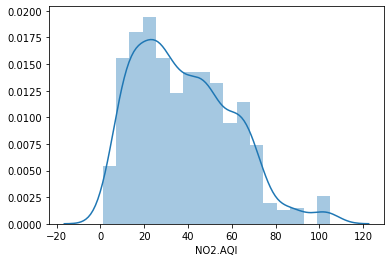

In [6]:
sns.distplot(pollution_data['NO2.AQI'])

plt.show()

sns.distplot() function shows the histogram and Kernel Density Estimation curve for a univariant data without including any attribute. From the following operation on the 'NO2.AQI'(means The calculated air quality index of Nitrogen Dioxide within a given day) column, we can see that most of the time, NO2 AQI value is in the range 5-70 and from the kde curve it can be seen that the most frequently observed value is about 25.

#### Change some of the attributes for this histogram
The colour of the histogram and the kde can be changed just by including the attribute 'color'. <br />
The function '.set_title()' sets the Title of the histogram. Similarly '.set_xlabel()' is used to specify the X axis label.

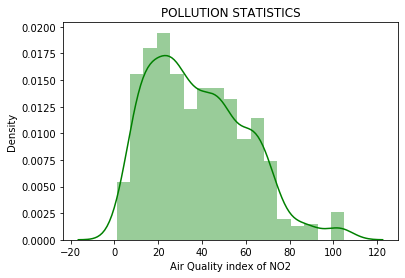

In [7]:
dist = sns.distplot(pollution_data["NO2.AQI"] , 
                    color = "Green")

dist.set_title("POLLUTION STATISTICS")

dist.set_xlabel("Air Quality index of NO2")

dist.set_ylabel("Density")

plt.show()

#### Plot the distribution on the vertical axis:

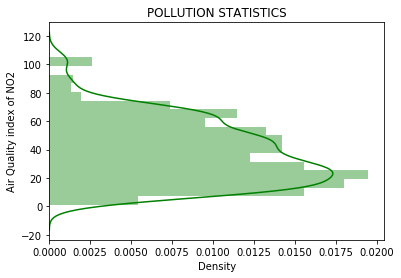

In [8]:
dist = sns.distplot(pollution_data["NO2.AQI"] , 
                    color = "Green", 
                    vertical = True)

dist.set_title("POLLUTION STATISTICS")

dist.set_xlabel("Density")

dist.set_ylabel("Air Quality index of NO2")

plt.show()

Now we can customize our plot by passing specific parameters to the underlying plot functions:

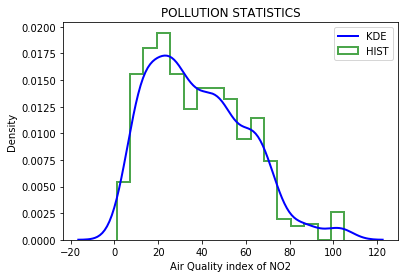

In [9]:
dist = sns.distplot(pollution_data["NO2.AQI"],
                    
                    kde_kws = {"color": "B",
                               "lw": 2 ,
                               "label": "KDE"},
                 
                    hist_kws = {"histtype": "step",
                                "linewidth": 2,
                                "alpha": 0.7, 
                                "color": "g",
                                "label":"HIST"})

dist.set_title("POLLUTION STATISTICS")
dist.set_xlabel("Air Quality index of NO2")
dist.set_ylabel("Density")

plt.show()

#### Remove the KDE line from the plot
If the kde is not desired then the kde is set to the False. The Y axis now shows the actual frequency of the bins rather than the density.

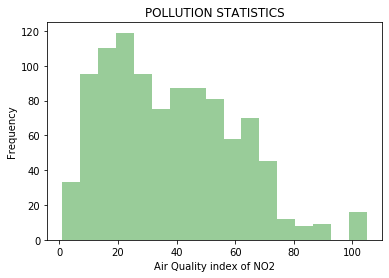

In [10]:
dist = sns.distplot(pollution_data["NO2.AQI"],
                    color = "Green",
                    kde = False)

dist.set_title("POLLUTION STATISTICS")
dist.set_xlabel("Air Quality index of NO2")

dist.set_ylabel("Frequency")

plt.show()

#### Set the number of bins for the histogram

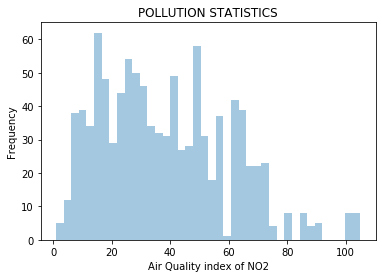

In [11]:
hist = sns.distplot(pollution_data["NO2.AQI"],
                    bins = 40,
                    kde = False)

hist.set_title("POLLUTION STATISTICS")
hist.set_xlabel("Air Quality index of NO2")
hist.set_ylabel("Frequency")

plt.show()

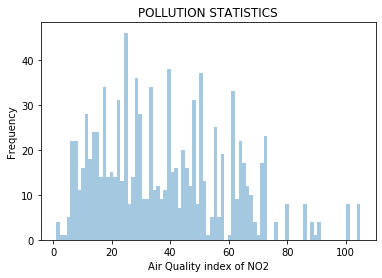

In [12]:
hist = sns.distplot(pollution_data["NO2.AQI"],
                    bins = 85,
                    kde = False)

hist.set_title("POLLUTION STATISTICS")
hist.set_xlabel("Air Quality index of NO2")
hist.set_ylabel("Frequency")

plt.show()

#### Remove the histogram from the plot
Just like with the KDE line, if the histogram should not be included in the plot, then 'hist' attribute is set to False.

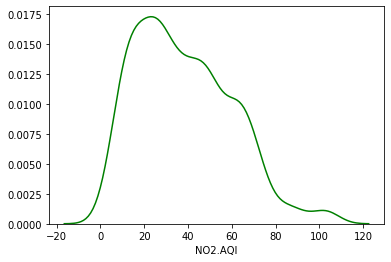

In [13]:
dist = sns.distplot(pollution_data["NO2.AQI"],
                    color = "Green",
                    hist = False)

hist.set_title("POLLUTION STATISTICS")
hist.set_xlabel("Air Quality index of NO2")
hist.set_ylabel("Density")

plt.show()

### Rug Plots
A rug plot is a compact way of illustrating the distribution of a variable. It helps us visualize the density of a set of values along it's entire range

#### Plotting each datapoint as a stick - Rugplot
sns.rugplot() function directly gives the rug plot and the height can be changed from the 'height' attribute and with the 'axis' attribute the plotting axis is set.

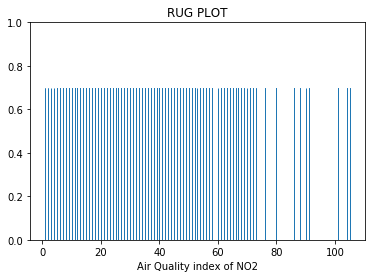

In [14]:
rug = sns.rugplot(pollution_data["NO2.AQI"],
                  height = 0.7,
                  axis = "x")

rug.set_title("RUG PLOT")
rug.set_xlabel("Air Quality index of NO2")

plt.show()

#### Including a rug plot in a distplot
Rug plot can be included in a distribution plot by adding the 'rug' attribute and setting it to True. If you want to zoom in your plot we can do so by using figsize() command.

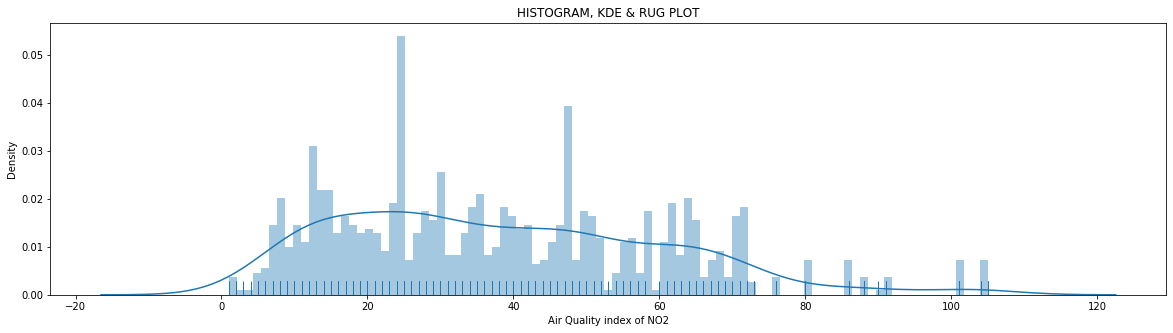

In [15]:
plt.subplots(figsize = (20,5))

dist = sns.distplot(pollution_data["NO2.AQI"] , 
                    bins = 95, 
                    rug = True)

dist.set_title("HISTOGRAM, KDE & RUG PLOT")
dist.set_xlabel("Air Quality index of NO2")
dist.set_ylabel("Density")

plt.show()

#### Decide what you would like to view in your distplot
Here the histogram is not desired so we set it as false.

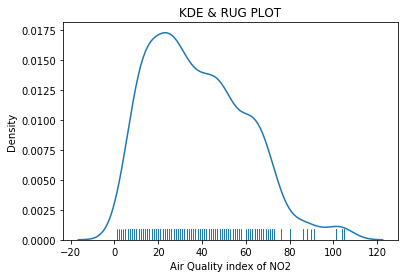

In [16]:
dist = sns.distplot(pollution_data["NO2.AQI"],
                    hist = False,
                    rug = True)

dist.set_title("KDE & RUG PLOT")
dist.set_xlabel("Air Quality index of NO2")
dist.set_ylabel("Density")

plt.show()

#### A KDE Plot
The 'Shade' attribute is set to 'True' in order to create a shaded region.

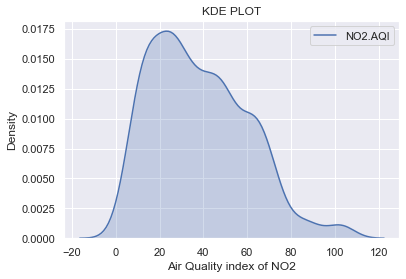

In [17]:
sns.set(color_codes = True)

plot = sns.kdeplot(pollution_data["NO2.AQI"],
                   shade = True,
                   color = "b")

plot.set_title("KDE PLOT")
plot.set_xlabel("Air Quality index of NO2")
plot.set_ylabel("Density")

plt.show()

The bandwidth is set by the 'bw' attribute and writing the desired values. The label can be added by 'label' attribute and equating it to the bandwidth value.

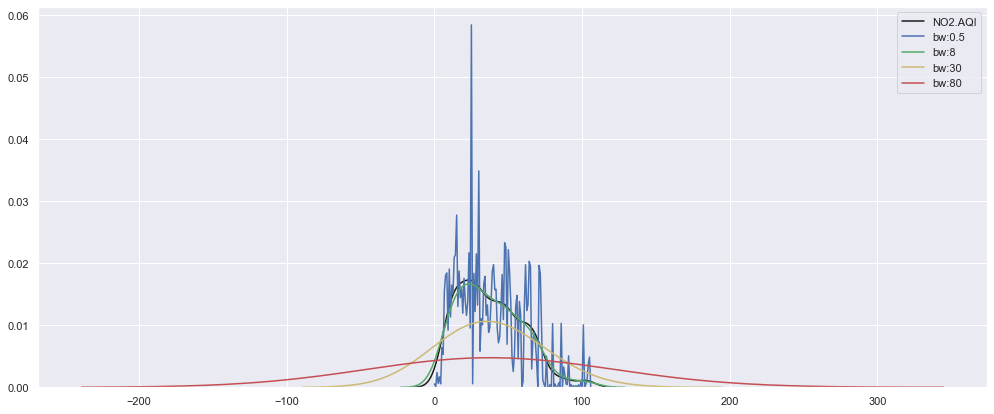

In [18]:
plt.subplots(figsize = (17,7))

sns.kdeplot(pollution_data["NO2.AQI"] ,
            color = "k")

sns.kdeplot(pollution_data["NO2.AQI"] , 
            bw = 0.3 ,
            label = "bw:0.5",
            color = "b")

sns.kdeplot(pollution_data["NO2.AQI"] ,
            bw = 8 ,
            label = "bw:8", 
            color = "g")

sns.kdeplot(pollution_data["NO2.AQI"] ,
            bw = 30 ,
            label = "bw:30" ,
            color = "y")

sns.kdeplot(pollution_data["NO2.AQI"] ,
            bw = 80 , 
            label = "bw:80" ,
            color = "r")

plt.show()

We can make a few observations from the obtained plot.
* Smaller the bandwidth parameter, more accurate is the curve. But too small a bandwidth unnecessarily crowds the datapoints
* When explicitly not specified, the tool automatically choses the bandwidth it thinks best describes the distribution, which, more often than not, turns out pretty close.
* While estimating to draw the curve, the path traces points that are beyond the range of the dataset.
* The bw parameter controls how tightly the estimation is fit to the data.

## For distributions which vary randomly in two variables : BIVARIATE DISTRIBUTIONS

### sns.jointplot() function is used to plot bivariant data i.e data with two variables.
We examine the relationship between the mean NO2 values and mean CO levels

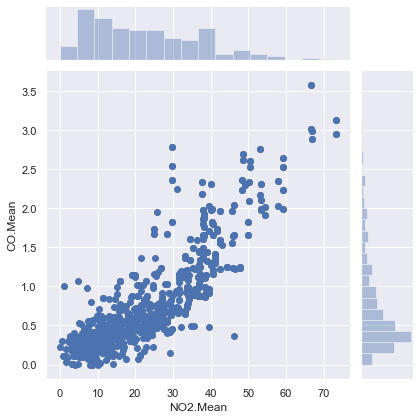

In [19]:
joint_plot = sns.jointplot("NO2.Mean",
                           "CO.Mean",
                           data = pollution_data)

plt.show()

And from the above graph we can see that most of the time (for last 8 years)around 9pm the NO2 level is max of about 75 Parts per billion.

##### Add regression and kernel density fits:

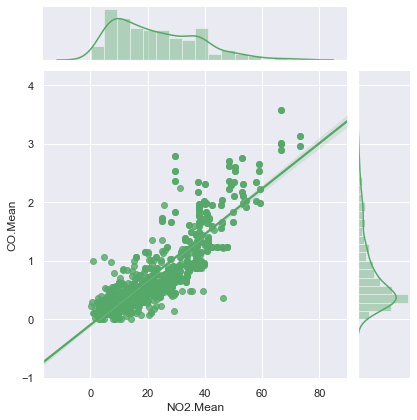

In [20]:
joint_plot = sns.jointplot("NO2.Mean",
                           "CO.Mean",
                           data = pollution_data, 
                           kind = "reg",
                           color = "g")

plt.show()

The x limit and y limit can be changed by the attributes 'xlim' and 'ylim'.

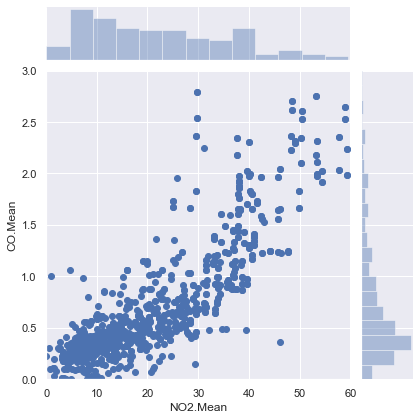

In [21]:
joint_plot = sns.jointplot("NO2.Mean",
                           "CO.Mean",
                           data = pollution_data, 
                           xlim = {0,60},
                           ylim = {0,3})

plt.show()

#### Hexbin plots
In the folowing plot the scatter plot has been replaced by the attribute 'kind' and equatting it to 'hex'. This 'hex' keyword produces Hexbin plot or in other words, the bivariate analogue of a histogram.

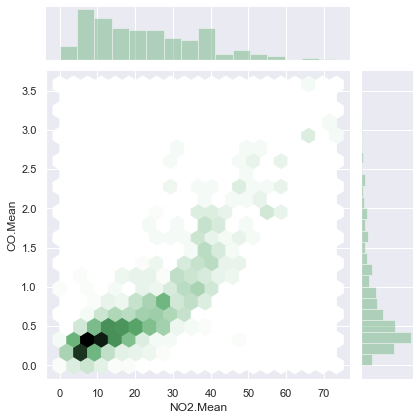

In [22]:
with sns.axes_style("darkgrid"):
    
    sns.jointplot("NO2.Mean",
                  "CO.Mean",
                   data = pollution_data,
                   kind = "hex",
                   color = "G")
    
plt.show()

The above is called a Hexbin plot, or in other words, the bivariate analogue of a histogram. The theme 'darkgrid'(stands for white background, with grids on the plot) is used to specify background colour, as hexbin plots look best in this contrast mode.

We see the histograms of the individual plots on the right side and top side of the plot. Observing from that, the cross section where the peaks of the two histograms are present are the darkest regions of our hexbin plot. 
(From last 8 years )

#### Create a plot with ticks along all edges
Replace the scatterplots and histograms with density estimates and align the marginal axes tightly with the joint axes

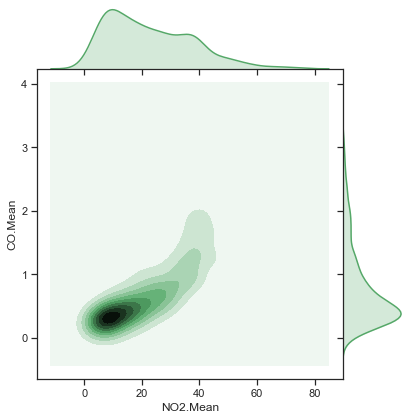

In [23]:
with sns.axes_style("ticks"):
    sns.jointplot("NO2.Mean",
                  "CO.Mean",
                   data = pollution_data,
                   kind = "kde",
                   space = 0,
                   color = "G")
    
plt.show()

#### Create space between the plots

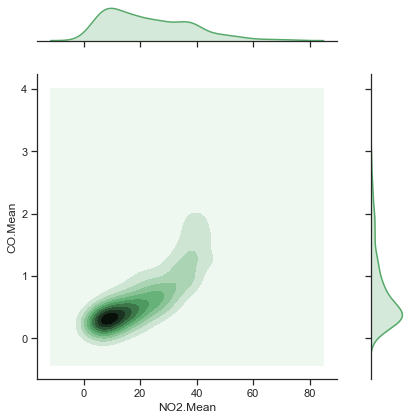

In [24]:
with sns.axes_style('ticks'):
    
    sns.jointplot("NO2.Mean",
                  "CO.Mean",
                   data = pollution_data,
                   kind = "kde",
                   space = 1,
                   color = "G")
    
plt.show()

As expected, the graph is exactly the same as the previous, with just the outlines highlighted. These are the kernel density estimation curves. The color gradient differentiates the peaks of both the concentrations.

Use more contour levels and a different color palette and also add a colorbar for the contours

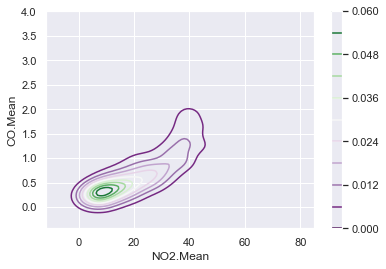

In [25]:
sns.kdeplot(pollution_data["NO2.Mean"],
            pollution_data["CO.Mean"],
            cmap = "PRGn",
            cbar = True)

plt.show()

#### By the 'clip' attribute the x and y limit can be set
We set the lower bound and upper bound of values in the data

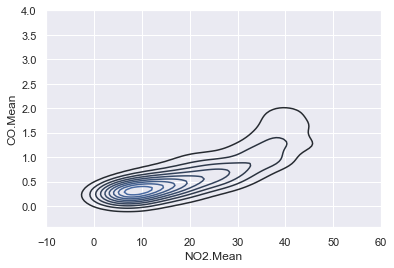

In [26]:
sns.kdeplot(pollution_data["NO2.Mean"],
            pollution_data["CO.Mean"],
            clip = (-10,60))

plt.show()

#### Here the rug plot is plotted for both of the variables. The colour is set and the height is changed with the 'color' and the 'height' attribute respectively.

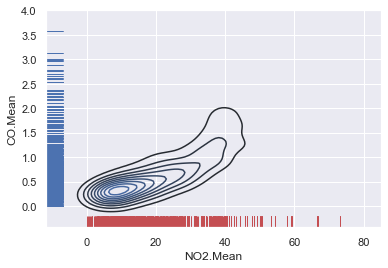

In [27]:
sns.kdeplot(pollution_data["NO2.Mean"],
            pollution_data["CO.Mean"])

sns.rugplot(pollution_data["NO2.Mean"],
            color = "r",
            height = .05)

sns.rugplot(pollution_data["CO.Mean"],
            color = "b",
            vertical = True,
            height = .05)

plt.show()

#### Create a smoother plot by increasing the n_levels
We have seen the bivariate histogram as layers and as curves. What if we want to view it as a single continuous region with different colour gradients? Increasing the n_levels allows us to define regions which are closer to each other and this will generate a plot where the countours appear to blend into each other

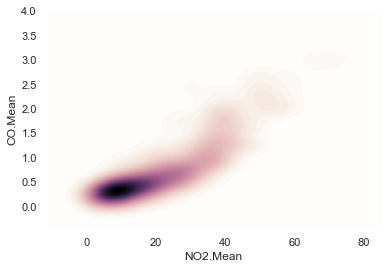

In [28]:
cmap = sns.cubehelix_palette(as_cmap = True, 
                             dark = 1, 
                             light = 0, 
                             reverse = True)

sns.kdeplot(pollution_data["NO2.Mean"],
            pollution_data["CO.Mean"], 
            cmap = cmap, 
            n_levels = 70,
            shade = True)

plt.show()

### PLOTTING PAIRWISE RELATIONSHIPS

Studying bivariate relationships between every two columns in a given dataset becomes a tedious job. Extending the idea of bivariate relationships, Seaborn provides a pairplot() function. 
This creates a matrix of axes and shows the relationship between every pair of columns in the dataframe.


#### Let us just plot the relationship between the average levels of NO2, CO, SO2 and O3

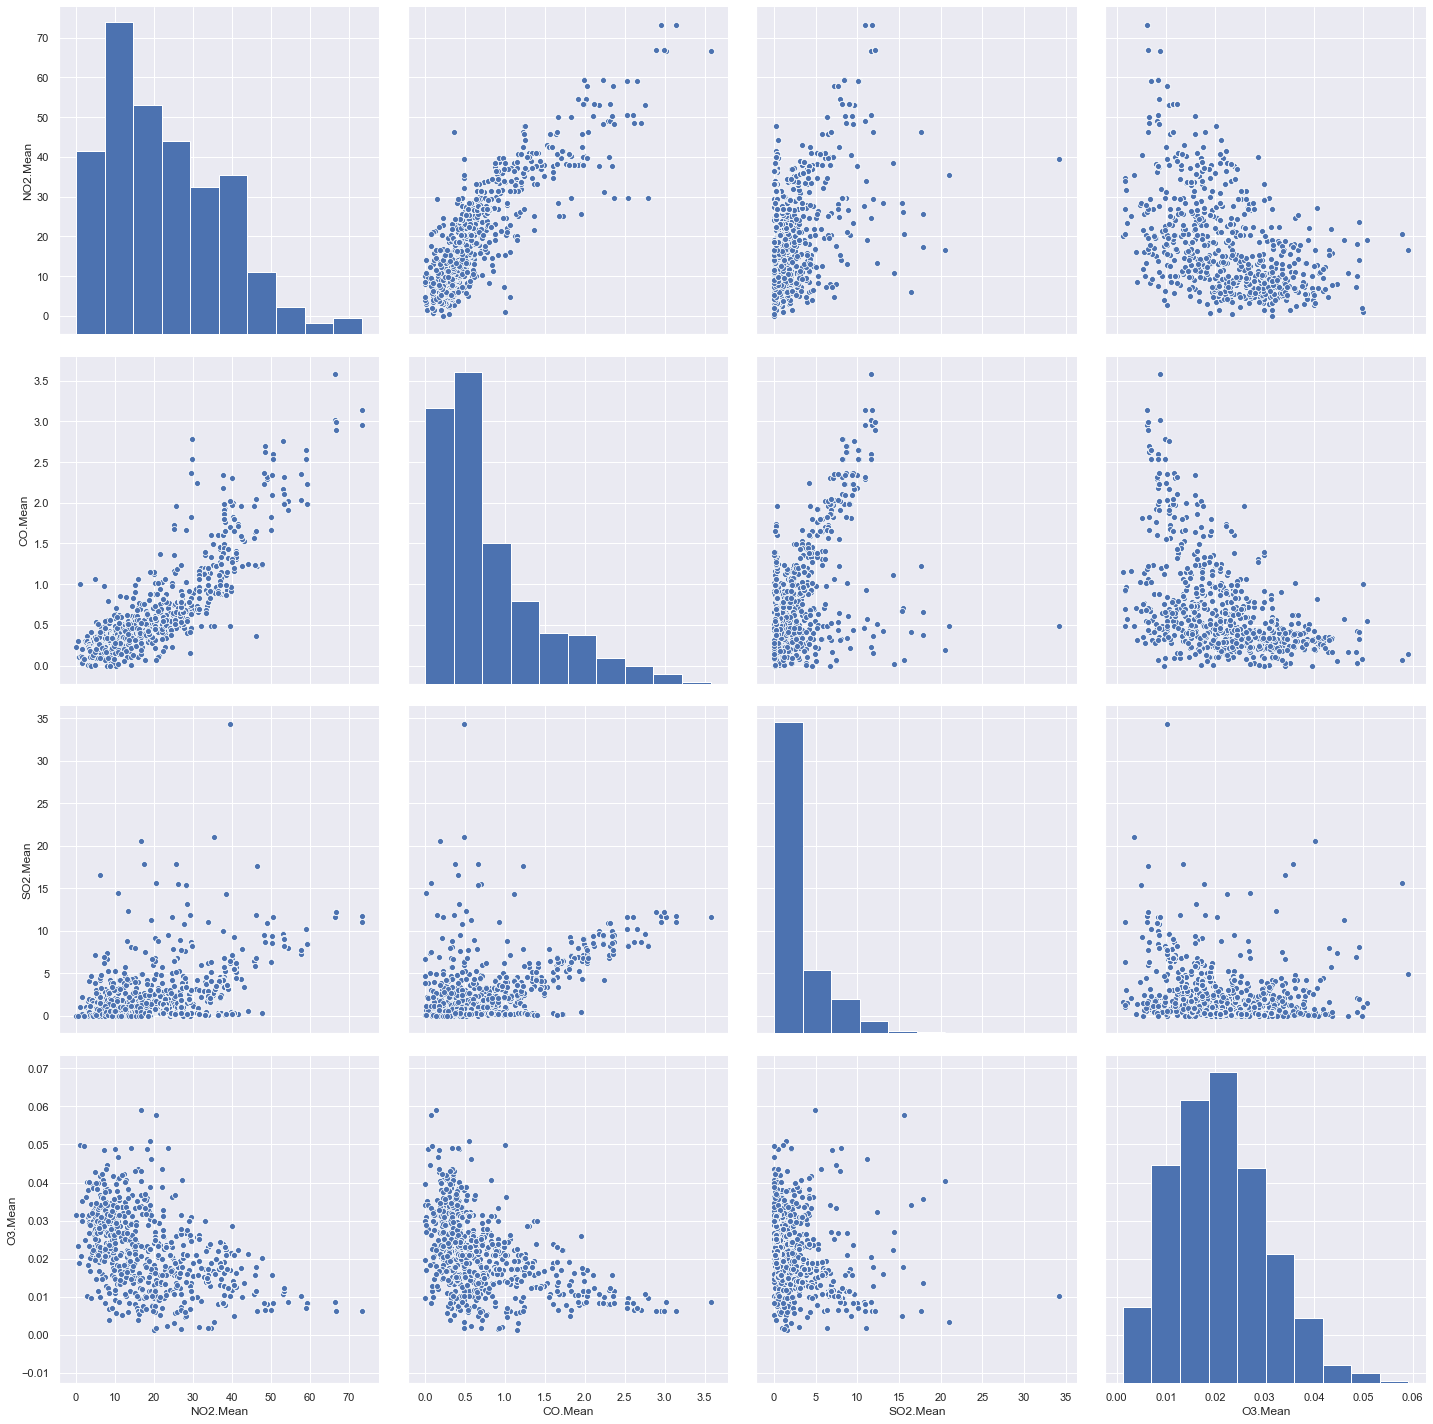

In [29]:
sns.pairplot(pollution_data,
             height = 5,
             vars = ["NO2.Mean",
                     "CO.Mean",
                     "SO2.Mean",
                     "O3.Mean"])

plt.show()

#### Use the hue property for more granularity
We have the plots of different pollutants. Let us classify them based on the year. We could then relate pollutants to the year of their reading and examine the effects of time and the presence of the pollutants

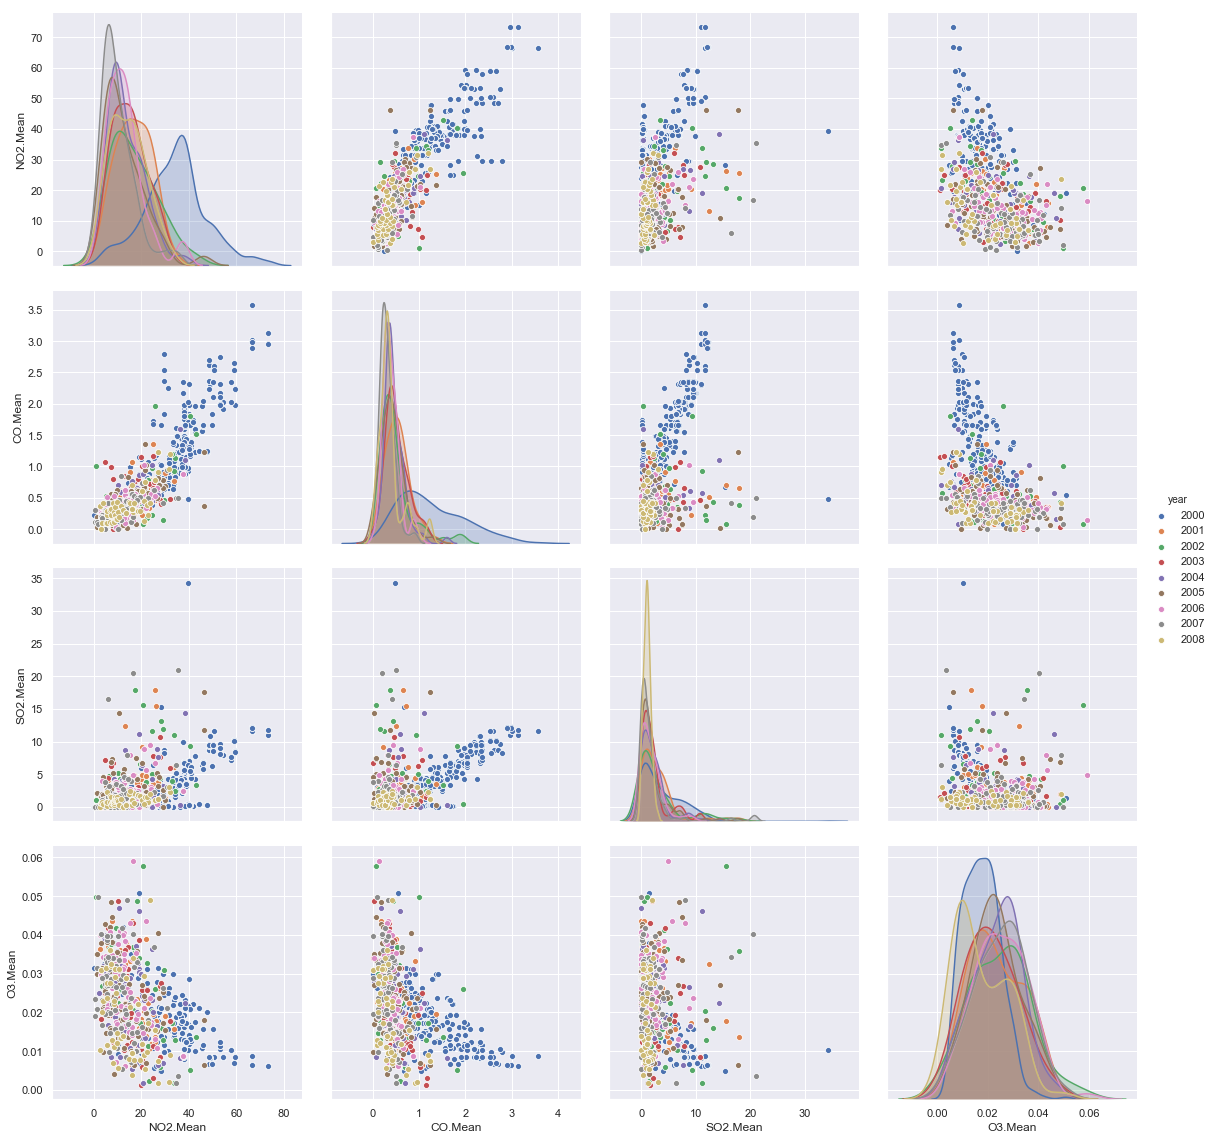

In [29]:
sns.pairplot(pollution_data,
             height = 4,
             vars = ["NO2.Mean",
                     "CO.Mean",
                     "SO2.Mean",
                     "O3.Mean"],
             hue = "year")

plt.show()

*A general trend we can easily observe from the bright yellow spots in the graphs is that this is the most recent year.

#### Fit linear regression models to the scatter plots

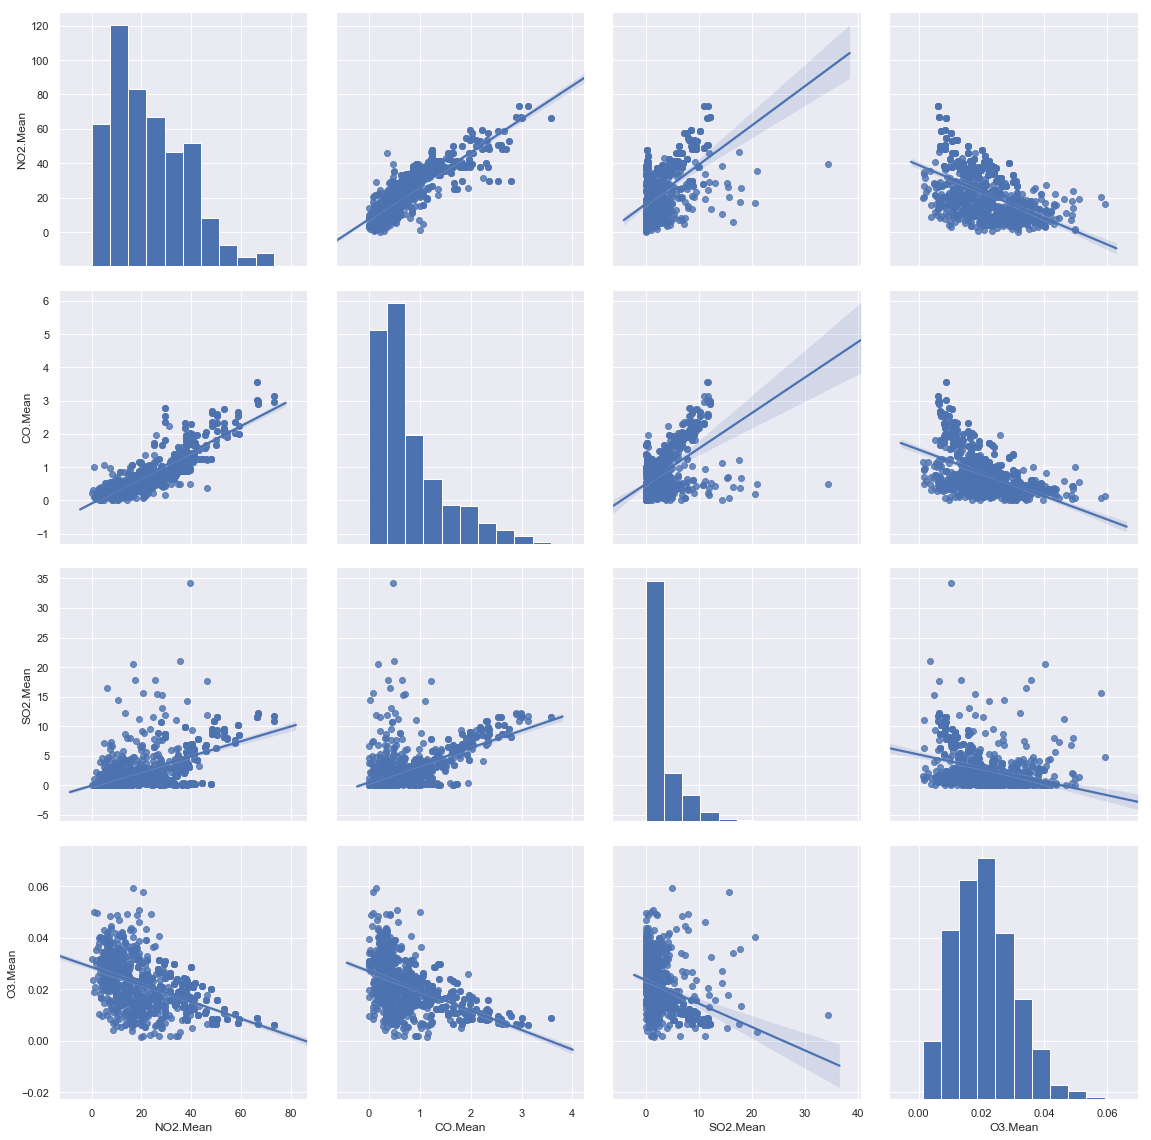

In [30]:
sns.pairplot(pollution_data,
             height = 4,
             vars = ["NO2.Mean",
                     "CO.Mean",
                     "SO2.Mean",
                     "O3.Mean"],
             kind = "reg")

plt.show()

#### Use kernel density estimates for univariate plots

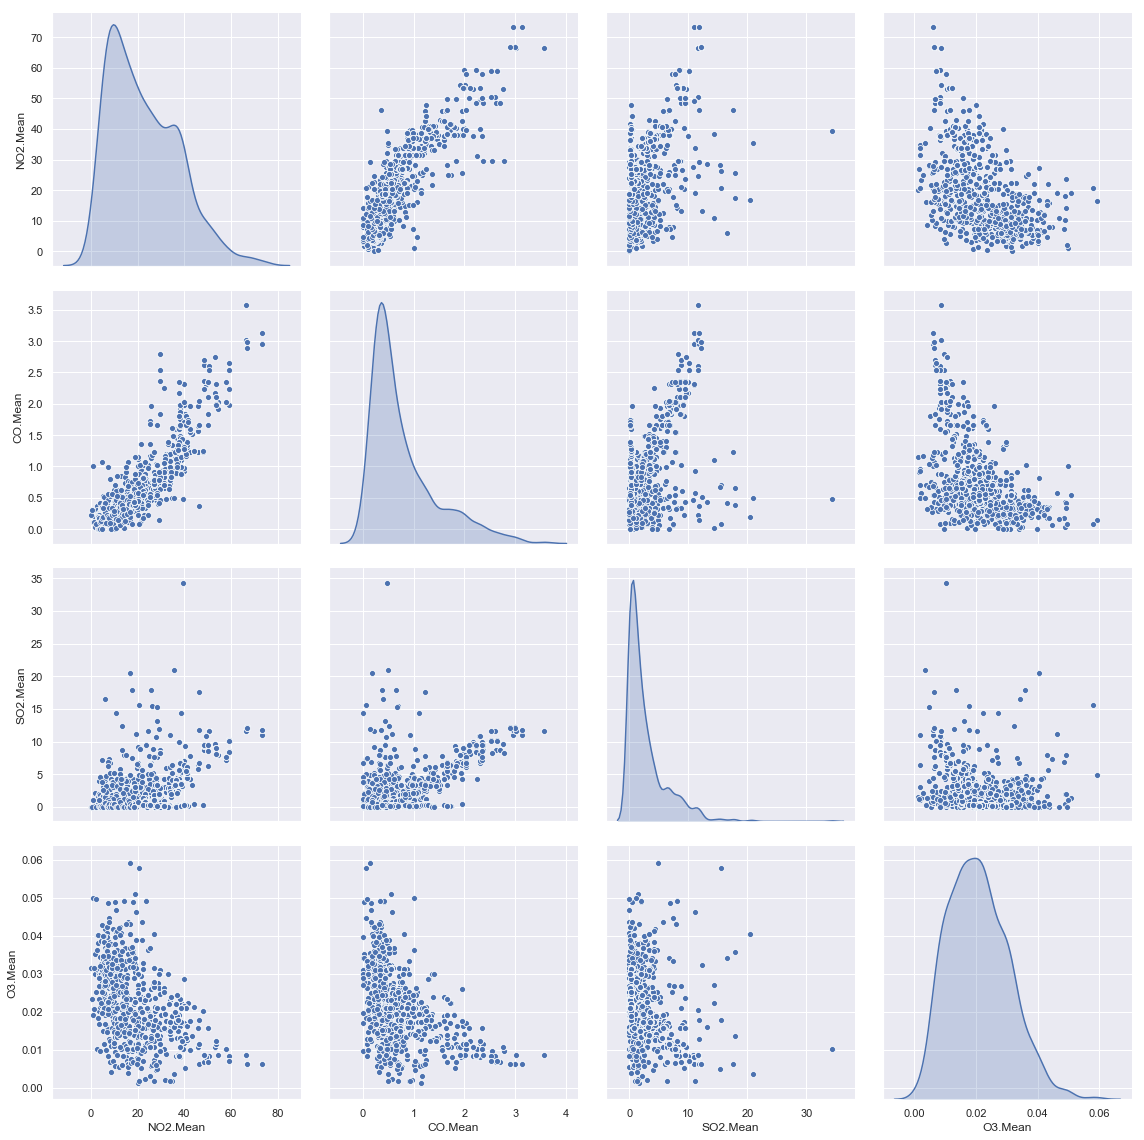

In [31]:
sns.pairplot(pollution_data,
             height = 4,
             vars = ["NO2.Mean",
                     "CO.Mean",
                     "SO2.Mean",
                     "O3.Mean"],
             diag_kind = "kde")

plt.show()

### Correlation Matrix

dataframe.corr() function is used to compute pairwise correlation of the columns. 
sns.heatmap() function is to get the heatmap after determining the correalation between the variables:
* the 'square' attribute allows the heat map to be visualised in a square
* the 'annot' attribute enables the correlation value to be seen
* the 'fmt' attribute is to set the precision of the annotation. If it is set to '.2f' then number of digits after the decimal will be two
* The 'cmap' attribute is used to change the colour map of the heatmap

In [32]:
pollutants_mean = pollution_data[['NO2.Mean', 
                                  'CO.Mean', 
                                  'SO2.Mean', 
                                  'O3.Mean']]

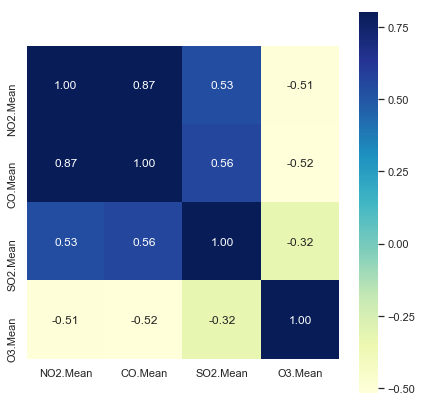

In [33]:
corrmatrix = pollutants_mean.corr()

plt.subplots(figsize = (7,7))

sns.heatmap(corrmatrix ,
            vmax = .8,
            square = True,
            annot = True, 
            fmt = ".2f", 
            cmap = "YlGnBu")

plt.show()

From the above heatmap it can be seen that the CO and NO2 levels are strongly correlated, while each O3 levels are negatively correlated with the other pollutants